# Season cards at Bern's major sport klubs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Importing and cleaning the data.

### Data for YB (Football)

In [5]:
# Import the data for YB (football). 
df_yb = pd.read_csv('data/original_yb.csv')
df_yb.head()

,PLZ,YB
0,1066,2
1,1110,1
2,1242,34
3,1260,1
4,1510,1


### Data for SCB

In [6]:
# Import the data for SCB (ice hockey)
df_scb = pd.read_csv('data/original_scb.csv')
df_scb = df_scb[['PLZ','SCB']] # Getting rid of the columns 'Gemeinde' and 'Land' to avoid problems while merging (multiple values for Gemeinde with the same PLZ)
df_scb.head()

,PLZ,SCB
0,1003,1
1,1004,1
2,1005,2
3,1023,1
4,1024,1


In [7]:
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
259,3053,135
260,3053,14
261,3053,1
262,3053,1
263,3053,4
264,3053,2


In [8]:
# The dataset contains some ZIP codes with more than four digits. These are foreign ZIP codes.
df_scb[df_scb['PLZ'] > 9999]

,PLZ,SCB
1150,10405,1
1151,63599,1
1152,72514,1
1153,74100,1
1154,79774,1


In [9]:
# Let's save them to an own dataframe... 
df_scb_foreign = df_scb[df_scb['PLZ'] > 9999]

# ... and take them out of the original one. 
df_scb = df_scb[df_scb['PLZ'] < 9999]
df_scb[df_scb['PLZ'] > 9999]

,PLZ,SCB


In [10]:
# The data contains multiple entries for certain ZIP codes. For example for Münchenbuchsee. 
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
259,3053,135
260,3053,14
261,3053,1
262,3053,1
263,3053,4
264,3053,2


In [11]:
# Let's take the duplicates out. 
df_scb = df_scb.groupby('PLZ')['SCB'].sum()
df_scb = pd.DataFrame(df_scb)
df_scb = df_scb.reset_index()
df_scb[df_scb['PLZ'] == 3053]

,PLZ,SCB
226,3053,157


### Data about the ZIP code areas 

Quelle der Daten: Bundesamt für Statistik, statistisches Jahrbuch. Stand: 2014. ([Link zum Excel-Dokument](http://www.bfs.admin.ch/bfs/portal/de/index/themen/01/02/blank/key/raeumliche_verteilung/agglomerationen.Document.154450.xls))

Die Darstellung wird in der Tabellenverarbeitung vereinfacht. Mit Regex in "Atom" werden die Trennzeichen bei Tausenderwerten gelöscht: ```(\d+) (\d{3})``` suchen und durch ```$1$2``` ersetzen. 

In [12]:
# Import the data for the ZIP codes. 
df_plz = pd.read_csv('data/plz.csv')
df_plz.head(5)

,PLZ,Total,Schweiz,Ausland,Mann,Frau,0-4,5-9,10-14,15-19,...,80-84,85-89,90 und mehr,Ledig,Verheiratet,Verwitwet,Geschieden,Unverheiratet,In eingetrage-ner Partner-schaft,Aufgelöste Partnerschaft
0,1000,2964,1799,1165,1479,1485,126,199,175,326,...,31,21,13,1614,1114,85,148,1,2,0
1,1003,8269,4546,3723,4143,4126,422,297,218,311,...,146,135,93,4743,2353,343,775,0,53,2
2,1004,28996,16624,12372,13983,15013,1435,1154,1110,1266,...,752,560,293,14913,9852,1352,2782,3,85,8
3,1005,11645,6765,4880,5578,6067,536,472,429,509,...,289,214,134,6462,3596,502,1031,2,41,7
4,1006,14638,8859,5779,6976,7662,745,647,476,592,...,402,289,191,7706,4794,680,1423,0,29,6


### Community Names for ZIP codes
Unfortunately, a ZIP area can cover more than one community -- or just a part of it. Nevertheless, it is helpful to have human readable information about the towns and villages on the graphic. Therefor, I am importing a [dataset from Swiss Statistics](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0ahUKEwiW_frP9KrOAhVHNiYKHWADCBEQFggnMAE&url=http%3A%2F%2Fwww.bfs.admin.ch%2Fbfs%2Fportal%2Fde%2Findex%2Fthemen%2F00%2F01%2Fnew.Document.82420.xls&usg=AFQjCNHnUes7MxquUKSOx1xUd83jTFxaug&sig2=T2kCIHciJdVhbUMBUp5glQ). 

In [13]:
df_plz_names = pd.read_excel('data/plz_ort.xls')
df_plz_names[['PLZ4','GDENAMK', '%_IN_GDE']].sort_values(by='%_IN_GDE', ascending=False).head()
df_plz_names_neu = df_plz_names.groupby(by='PLZ4').apply(lambda x: ", ".join((x["GDENAMK"])))
df_plz_names_neu = pd.DataFrame(df_plz_names_neu)
df_plz_names_neu.columns = ['Ortsname']
df_plz_names_neu.index.names = ['PLZ']
df_plz_names_neu.reset_index(level=0, inplace=True)
df_plz_names_neu.head(10)

,PLZ,Ortsname
0,1000,Lausanne
1,1003,Lausanne
2,1004,Lausanne
3,1005,Lausanne
4,1006,"Lausanne, Pully"
5,1007,Lausanne
6,1008,"Jouxtens-Mézery, Prilly, Renens (VD)"
7,1009,Pully
8,1010,Lausanne
9,1011,Lausanne


## Merge the four data sets

In [14]:
# Merge the three data sets. 
df_temp = df_plz.merge(df_scb, on='PLZ', how='left')
df_temp = df_temp.merge(df_plz_names_neu, on='PLZ', how='left')
df = df_temp.merge(df_yb, on='PLZ', how='left')
df.head()

,PLZ,Total,Schweiz,Ausland,Mann,Frau,0-4,5-9,10-14,15-19,...,Ledig,Verheiratet,Verwitwet,Geschieden,Unverheiratet,In eingetrage-ner Partner-schaft,Aufgelöste Partnerschaft,SCB,Ortsname,YB
0,1000,2964,1799,1165,1479,1485,126,199,175,326,...,1614,1114,85,148,1,2,0,NaN,Lausanne,NaN
1,1003,8269,4546,3723,4143,4126,422,297,218,311,...,4743,2353,343,775,0,53,2,1.0,Lausanne,NaN
2,1004,28996,16624,12372,13983,15013,1435,1154,1110,1266,...,14913,9852,1352,2782,3,85,8,1.0,Lausanne,NaN
3,1005,11645,6765,4880,5578,6067,536,472,429,509,...,6462,3596,502,1031,2,41,7,2.0,Lausanne,NaN
4,1006,14638,8859,5779,6976,7662,745,647,476,592,...,7706,4794,680,1423,0,29,6,NaN,"Lausanne, Pully",NaN


## Analyzing the data

In [15]:
# How many cards did YB sell? 
df['YB'].sum()

9815.0

In [16]:
# How many cards did SCB sell?
df['SCB'].sum()

9177.0

In [17]:
# How many entries are available for YB? 
df['YB'].count()

594

In [18]:
# How many entries are available for SCB?
df['SCB'].count()

941

In [19]:
# What ZIP code has the highest number of YB cards?
df[['PLZ','Ortsname','YB']].sort_values(by='YB', ascending=False).head(20)

,PLZ,Ortsname,YB
861,3014,Bern,829.0
855,3007,"Bern, Köniz",394.0
860,3013,Bern,358.0
854,3006,Bern,323.0
890,3072,"Bern, Ostermundigen",249.0
859,3012,Bern,233.0
851,3000,NaN,208.0
863,3018,Bern,188.0
882,3052,"Zollikofen, Münchenbuchsee",186.0
883,3053,"Rapperswil (BE), Schüpfen, Deisswil b. München...",185.0


In [20]:
# What ZIP code have the highest numbers of SCB cards?
df[['PLZ','Ortsname','SCB']].sort_values(by='SCB', ascending=False).head(20)

,PLZ,Ortsname,SCB
890,3072,"Bern, Ostermundigen",249.0
917,3123,"Belp, Kehrsatz, Toffen",211.0
861,3014,Bern,191.0
863,3018,Bern,165.0
883,3053,"Rapperswil (BE), Schüpfen, Deisswil b. München...",157.0
854,3006,Bern,155.0
882,3052,"Zollikofen, Münchenbuchsee",146.0
885,3063,"Bern, Ittigen, Ostermundigen",136.0
907,3098,Köniz,132.0
855,3007,"Bern, Köniz",127.0


In [21]:
# What ZIP code has the highest number of YB cards per capita?
df['YB_relativ'] = df['YB'] / df['Total']
df['YB_pro_1000'] = df['YB_relativ'] * 1000
df[['PLZ', 'Ortsname','YB_relativ','YB_pro_1000']].sort_values(by='YB_relativ', ascending=False).head(20)



,PLZ,Ortsname,YB_relativ,YB_pro_1000
851,3000,NaN,0.319508,319.508449
861,3014,Bern,0.060773,60.772671
858,3011,Bern,0.034856,34.856029
860,3013,Bern,0.034849,34.848632
950,3202,"Frauenkappelen, Mühleberg",0.031250,31.250000
1012,3313,Fraubrunnen,0.027897,27.896996
1008,3307,Messen,0.026455,26.455026
855,3007,"Bern, Köniz",0.025775,25.775219
980,3262,Grossaffoltern,0.024806,24.806202
1009,3308,Fraubrunnen,0.023810,23.809524


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


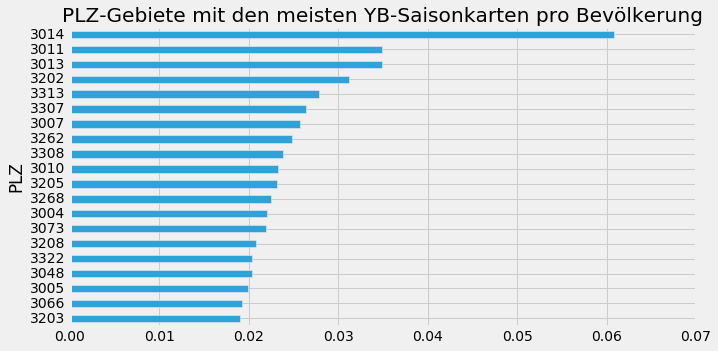

In [22]:
# Let's take out the ZIP code 3000 since these are probably mainly postboxes and companies. 
df[df['PLZ'] != 3000][['PLZ', 'Ortsname', 'YB_relativ', 'YB_pro_1000']].sort_values(by='YB_relativ', ascending=False).head(20).sort('YB_relativ', ascending=True).plot(kind='barh', x='PLZ', y='YB_relativ', title='PLZ-Gebiete mit den meisten YB-Saisonkarten pro Bevölkerung', legend=False, figsize = [10,5])
plt.savefig('output/YB_PLZ.svg')

In [23]:
# What ZIP code has the highest number of SCB cards per capita?
df['SCB_relativ'] = df['SCB'] / df['Total']
df['SCB_pro_1000'] = df['SCB_relativ'] * 1000
df[['PLZ', 'Ortsname', 'Total', 'SCB_relativ', 'SCB_pro_1000']].sort_values(by='SCB_relativ', ascending=False).head(20)

,PLZ,Ortsname,Total,SCB_relativ,SCB_pro_1000
1008,3307,Messen,189,0.052910,52.910053
956,3208,Gurbrü,240,0.037500,37.500000
769,2723,"Cortébert, Courtelary, Mont-Tramelan, Tramelan",120,0.033333,33.333333
944,3179,"Kriechenwil, Gurmels",432,0.030093,30.092593
881,3049,Wohlen bei Bern,510,0.027451,27.450980
869,3034,Wohlen bei Bern,261,0.026820,26.819923
977,3255,Rapperswil (BE),1112,0.023381,23.381295
857,3010,Bern,43,0.023256,23.255814
884,3054,Schüpfen,3664,0.023199,23.198690
876,3044,Wohlen bei Bern,649,0.023112,23.112481


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


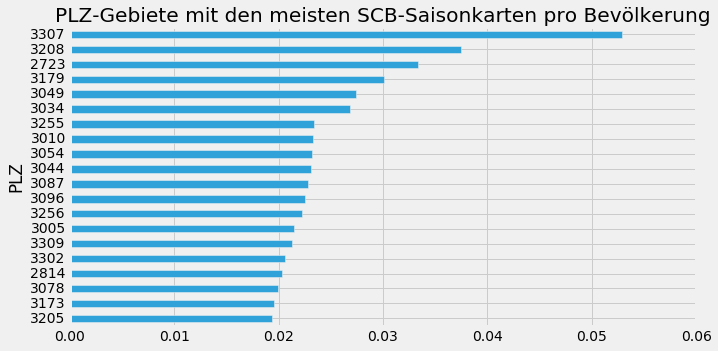

In [24]:
# Let's plot it 
df[['PLZ', 'Ortsname', 'SCB_relativ']].sort_values(by='SCB_relativ', ascending=False).head(20).sort('SCB_relativ', ascending=True).plot(kind='barh', x='PLZ', y='SCB_relativ', title='PLZ-Gebiete mit den meisten SCB-Saisonkarten pro Bevölkerung', legend=False, figsize = [10,5])
plt.savefig('output/SCB_PLZ.svg')

In [25]:
# In what ZIP code they sold the same amount of SCB as YB cards?
df.loc[(df["YB"] == df["SCB"])].sort_values(by='SCB', ascending=False)[['PLZ', 'Ortsname', 'YB', 'SCB']].head(5)

,PLZ,Ortsname,YB,SCB
890,3072,"Bern, Ostermundigen",249.0,249.0
912,3113,"Rubigen, Worb",39.0,39.0
939,3174,"Köniz, Neuenegg",30.0,30.0
952,3204,"Mühleberg, Neuenegg",17.0,17.0
1053,3432,"Hasle bei Burgdorf, Rüderswil, Lützelflüh",12.0,12.0


In [55]:
# Rural or urban -- the check.

urban_zip = range(3000,3028)

def derby(val):
    if val < 0: 
        return "SCB gewinnt"
    elif val > 0:
        return "YB gewinnt"
    else:
        return "Unentschieden"

df['derby'] = (df['YB'] - df['SCB']).apply(derby)
df_stadt = df[['PLZ','SCB','SCB_pro_1000','YB','YB_pro_1000', 'derby']][(df["PLZ"] >= 3000) & (df["PLZ"] <= 3027)]
df_stadt

,PLZ,SCB,SCB_pro_1000,YB,YB_pro_1000,derby
851,3000,8.0,12.288786,208.0,319.508449,YB gewinnt
852,3004,24.0,6.960557,76.0,22.041763,YB gewinnt
853,3005,98.0,21.472393,91.0,19.938650,SCB gewinnt
854,3006,155.0,8.535242,323.0,17.786344,YB gewinnt
855,3007,127.0,8.308256,394.0,25.775219,YB gewinnt
856,3008,89.0,8.981734,149.0,15.036835,YB gewinnt
857,3010,1.0,23.255814,1.0,23.255814,Unentschieden
858,3011,72.0,15.587790,161.0,34.856029,YB gewinnt
859,3012,76.0,5.640911,233.0,17.293847,YB gewinnt
860,3013,74.0,7.203349,358.0,34.848632,YB gewinnt


In [56]:
df_stadt['derby'].value_counts()

YB gewinnt       12
SCB gewinnt       3
Unentschieden     1
Name: derby, dtype: int64

## Export the necessary data for the map.
We will use [Carto](http://carto.com) to put the data on a map. Since Carto doesn't have the Shapefiles for the Swiss ZIP areas integrated, we need to download them from [Cadastre.ch](http://www.cadastre.ch/internet/kataster/de/home/services/service/plz.html) and simplify it with [Ogr2ogr](http://www.gdal.org/ogr2ogr.html). 

In [57]:
# Generate the CSV file for the import to 'Carto'.
df[['PLZ','Ortsname','YB','YB_relativ','YB_pro_1000', 'SCB','SCB_relativ', 'SCB_pro_1000', 'derby']].to_csv('output/fanmap_final.csv')